# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# define url
#query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | jambi
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | severo-kurilsk
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | guerrero negro
Processing Record 14 of Set 1 | nyurba
City not found. Skipping...
Processing Record 15 of Set 1 | baykit
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | bubaque
Processing Record 21 of Set 1 | banjar
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23 of Set 1 | balakhta
Processing Record 24 of Set 1 | port li

Processing Record 40 of Set 4 | takoradi
Processing Record 41 of Set 4 | manisa
Processing Record 42 of Set 4 | katangli
City not found. Skipping...
City not found. Skipping...
Processing Record 43 of Set 4 | mahebourg
Processing Record 44 of Set 4 | tura
Processing Record 45 of Set 4 | paraguacu
Processing Record 46 of Set 4 | bilma
Processing Record 47 of Set 4 | qeshm
Processing Record 48 of Set 4 | tortoli
Processing Record 49 of Set 4 | takaungu
Processing Record 1 of Set 5 | mirzapur
Processing Record 2 of Set 5 | inhambane
Processing Record 3 of Set 5 | winneba
Processing Record 4 of Set 5 | norman wells
Processing Record 5 of Set 5 | broome
Processing Record 6 of Set 5 | georgetown
Processing Record 7 of Set 5 | seoul
Processing Record 8 of Set 5 | deyang
Processing Record 9 of Set 5 | tecoanapa
Processing Record 10 of Set 5 | kyra
Processing Record 11 of Set 5 | prince rupert
City not found. Skipping...
Processing Record 12 of Set 5 | acari
Processing Record 13 of Set 5 | yash

Processing Record 26 of Set 8 | rio branco
Processing Record 27 of Set 8 | ginda
Processing Record 28 of Set 8 | mitu
Processing Record 29 of Set 8 | auki
Processing Record 30 of Set 8 | chicama
Processing Record 31 of Set 8 | dunedin
Processing Record 32 of Set 8 | bonavista
Processing Record 33 of Set 8 | port elizabeth
Processing Record 34 of Set 8 | verkhnevilyuysk
Processing Record 35 of Set 8 | lichuan
Processing Record 36 of Set 8 | altay
Processing Record 37 of Set 8 | deputatskiy
Processing Record 38 of Set 8 | cherskiy
Processing Record 39 of Set 8 | bambous virieux
Processing Record 40 of Set 8 | darhan
Processing Record 41 of Set 8 | bulgan
Processing Record 42 of Set 8 | nizwa
Processing Record 43 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 44 of Set 8 | pangoa
Processing Record 45 of Set 8 | marsabit
Processing Record 46 of Set 8 | salta
Processing Record 47 of Set 8 | andenes
Processing Record 48 of Set 8 | sikar
Processing Record 49 of Set 8 | nam tha
Process

Processing Record 17 of Set 12 | alibag
Processing Record 18 of Set 12 | saint-louis
Processing Record 19 of Set 12 | zhigansk
Processing Record 20 of Set 12 | mumbwa
Processing Record 21 of Set 12 | samarai
Processing Record 22 of Set 12 | port blair
Processing Record 23 of Set 12 | vanimo
Processing Record 24 of Set 12 | bartica
Processing Record 25 of Set 12 | cajnice
Processing Record 26 of Set 12 | dali
Processing Record 27 of Set 12 | tommot
Processing Record 28 of Set 12 | kenai
Processing Record 29 of Set 12 | festus
Processing Record 30 of Set 12 | maiduguri
Processing Record 31 of Set 12 | khuzhir
City not found. Skipping...
City not found. Skipping...
Processing Record 32 of Set 12 | yakeshi
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:

# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_dict

{'City': ['atuona',
  'rikitea',
  'puerto ayora',
  'kapaa',
  'upernavik',
  'jambi',
  'bluff',
  'lebu',
  'provideniya',
  'severo-kurilsk',
  'hobart',
  'castro',
  'guerrero negro',
  'nyurba',
  'baykit',
  'arraial do cabo',
  'ushuaia',
  'tiksi',
  'klaksvik',
  'bubaque',
  'banjar',
  'tuktoyaktuk',
  'balakhta',
  'port lincoln',
  'panama city',
  'avarua',
  'katherine',
  'bethel',
  'esperance',
  'busselton',
  'geraldton',
  'nome',
  'buala',
  'punta arenas',
  'lively',
  'albany',
  'sorong',
  'grand river south east',
  'yellowknife',
  'touros',
  'bitung',
  'tasiilaq',
  'kavieng',
  'ribeira grande',
  'kodinsk',
  'lata',
  'shimoda',
  'prince george',
  'wanning',
  'cidreira',
  'sayat',
  'carnarvon',
  'victoria',
  'aljezur',
  'mataura',
  'taywarah',
  'college',
  'tessalit',
  'port keats',
  'saint-philippe',
  'mukhen',
  'jamestown',
  'east london',
  'kashi',
  'sahuaripa',
  'new norfolk',
  'coahuayana',
  'torbay',
  'kristinehamn',
  '

In [7]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [8]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,atuona,74,PF,1579749829,70,-9.80,-139.03,81.19,9.71
1,rikitea,12,PF,1579749829,75,-23.12,-134.97,79.61,12.46
2,puerto ayora,40,ES,1579749829,93,36.59,-6.23,53.60,13.87
3,kapaa,1,US,1579749830,73,22.08,-159.32,77.00,8.05
4,upernavik,100,GL,1579749830,93,72.79,-56.15,0.32,8.79


In [9]:
weather_dataframe.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [10]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,atuona,74,PF,1579749829,70,-9.80,-139.03,81.19,9.71
1,rikitea,12,PF,1579749829,75,-23.12,-134.97,79.61,12.46
2,puerto ayora,40,ES,1579749829,93,36.59,-6.23,53.60,13.87
3,kapaa,1,US,1579749830,73,22.08,-159.32,77.00,8.05
4,upernavik,100,GL,1579749830,93,72.79,-56.15,0.32,8.79


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [11]:
time.strftime('%x')

'01/22/20'

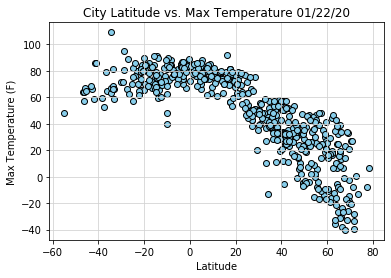

In [12]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

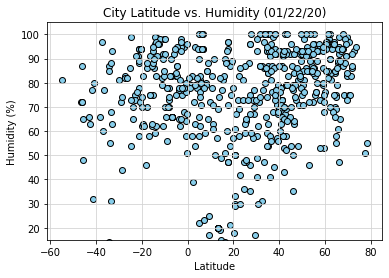

In [13]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime('%x') )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

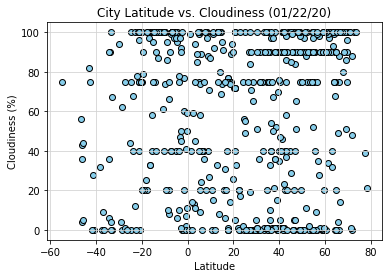

In [16]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime('%x') )               
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

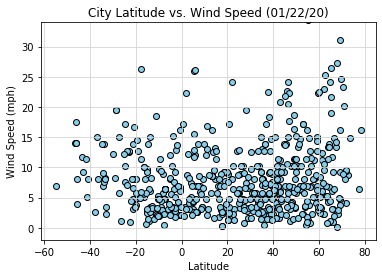

In [17]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime('%x') )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

In [ ]:
#Northern Hemisphere (greater than or equal to 0 degrees latitude)
#Southern Hemisphere (less than 0 degrees latitude)

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots
#def plot_linear(x_values, y_values, title, text_coordinates):
    #(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #regress_values = x_values*slope + intercept
    #line_eq = 'y= '+ str(round(slope,2)) + 'x + ' +str(round(intercept,2))
    
    #plt.scatter(x_values, y_values)
    #plt.plot(x_values, regress_values, "r-")
    #plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    #plt.xlabel('Lattitude')
    #plt.ylabel(title)
    #print(f'The r-squared is: {rvalue}')
    #plt.show()
    

In [23]:
#Define x and y values
x_values = weather_dataframe['Lat']
y_values = weather_dataframe['Max Temp']


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      75.843354
1      86.682595
2      38.093172
3      49.900785
4       8.635174
         ...    
566    18.595558
567    36.766749
568    58.225517
569    24.584809
570    27.766598
Name: Lat, Length: 571, dtype: float64


In [24]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.81x +67.87


The r-squared is: -0.8044795523037201


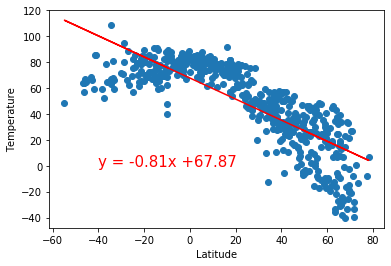

In [30]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-40,0),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


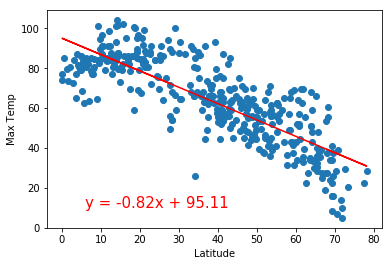

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


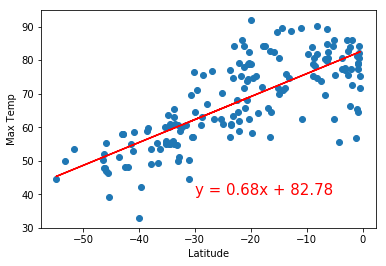

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


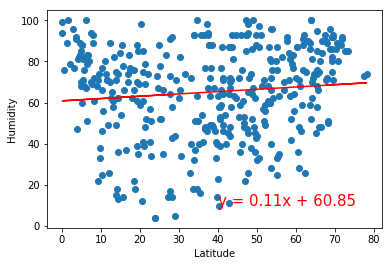

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


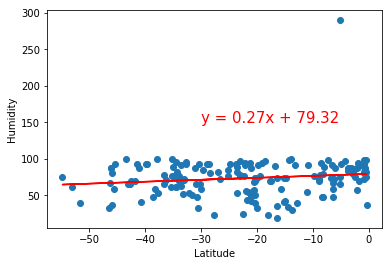

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


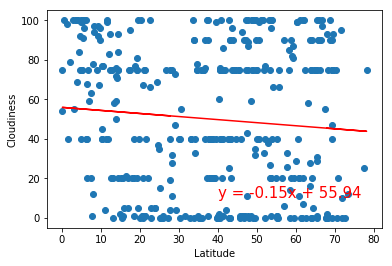

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


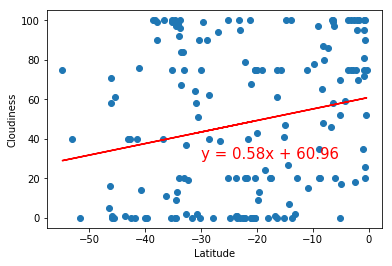

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


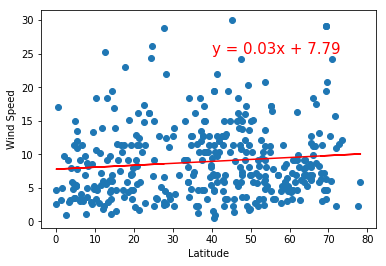

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


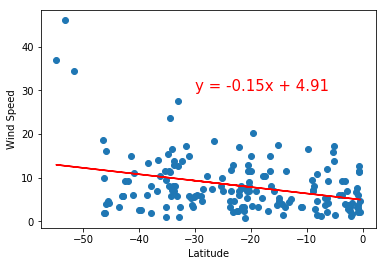